In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install emcee
!pip install corner

In [ ]:
import emcee

In [ ]:
# fitting a synthetic straight line data with errors
# drawn from gaussian/normal distribution
# i have to also construct the error bars on each point

m_true = 2.0
b_true = 5.0

# generating synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 20)
y = m_true*x + b_true + np.random.normal(0, 1, size=x.shape)
errs = np.random.normal(0, 1, size=x.shape)

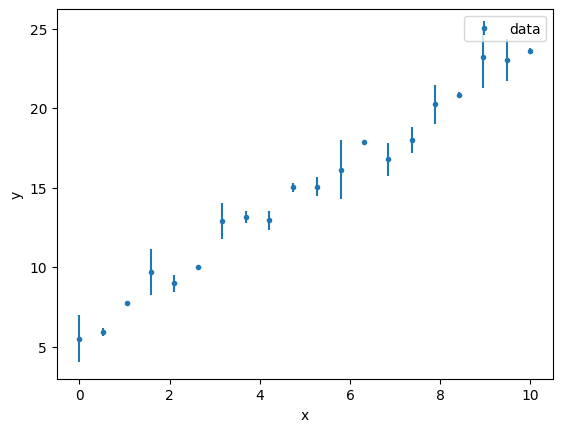

In [ ]:
# plotting

plt.errorbar(x, y, np.abs(errs), label='data', fmt='.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# how likely our data is given parameters m and b

def log_likelihood(params):
    m, b = params
    model = m*x + b
    return -0.5 * np.sum((y - model) ** 2)

In [ ]:
# setting up emcee

# Number of walkers and dimensions
nwalkers = 50
ndim = 2  # m and b

# Initial positions of the walkers
p0 = np.random.rand(nwalkers, ndim) * 10  # Random initial guesses

# Define a function to calculate the log-posterior
def log_posterior(params):
    return log_likelihood(params)  # Assuming uniform prior

# Set up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior)


In [ ]:
# Run the MCMC
sampler.run_mcmc(p0, 500, progress=True)  # 500 steps


State([[1.7208943  6.17705823]
 [1.84911572 5.19199829]
 [1.88957834 5.4345444 ]
 [1.81156358 5.62998044]
 [1.9368901  5.0103347 ]
 [1.77752349 5.6236765 ]
 [1.85279218 5.40434042]
 [1.63502896 6.71046398]
 [1.76517547 5.76622747]
 [1.82892205 5.35445572]
 [1.7974653  5.74367439]
 [1.73437749 6.02262111]
 [1.79415805 5.61735262]
 [1.72114767 6.22954899]
 [1.81739325 5.75335176]
 [1.79843682 5.61980903]
 [1.90685087 5.76110858]
 [1.97250341 5.1803936 ]
 [1.965036   5.04947713]
 [1.83120988 5.60263317]
 [1.6848512  6.50502698]
 [1.83728393 5.53629961]
 [1.83712833 5.54833356]
 [1.84753908 5.2804459 ]
 [1.82719891 5.8427716 ]
 [1.73246261 6.36541839]
 [1.85759098 5.33238527]
 [1.85136944 5.71589109]
 [1.73546186 6.32684934]
 [1.82013751 5.61675571]
 [1.86570489 5.23413793]
 [1.89942448 5.80503933]
 [1.78063541 5.86263481]
 [1.86977931 5.36360844]
 [1.85203153 5.32161217]
 [1.84373071 5.60645153]
 [1.73330612 6.30096651]
 [1.86566224 5.70651013]
 [1.89624769 5.69355091]
 [1.73626752 6.3455

In [ ]:
samples

array([[ 9.23898834, -1.37858035],
       [ 1.90646018,  4.20692595],
       [ 9.85650454,  2.42055272],
       ...,
       [ 1.84604029,  5.66853504],
       [ 1.91117646,  5.34013605],
       [ 1.74256435,  6.37110288]])

In [ ]:
# Get samples
samples = sampler.get_chain(flat=True)

# Compute the mean of the samples
m_est, b_est = np.mean(samples, axis=0)

print(f"Estimated slope (m): {m_est:.2f}")
print(f"Estimated intercept (b): {b_est:.2f}")


Estimated slope (m): 1.88
Estimated intercept (b): 5.70


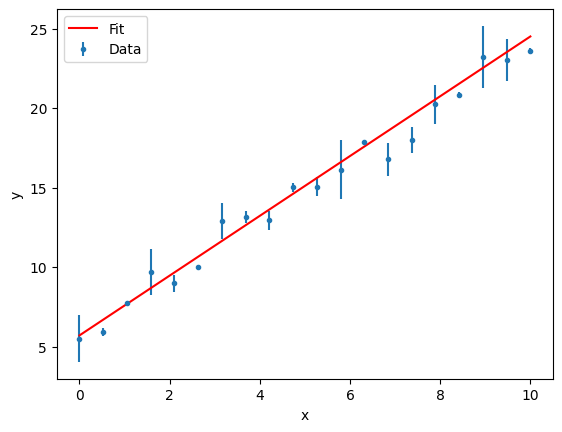

In [ ]:
# Plot the results
plt.errorbar(x, y, np.abs(errs), label='Data', fmt='.')
plt.plot(x, m_est * x + b_est, color='red', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
!pip install corner

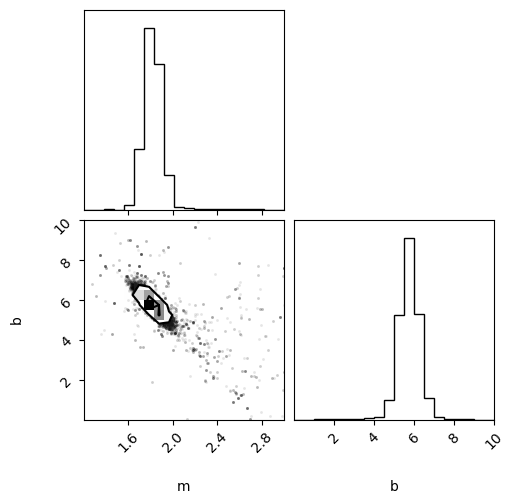

In [ ]:
# trace plots

import corner
fig = corner.corner(samples, labels=["m", "b"], range=([1.2, 3], [0, 10]))
plt.show()


### Fitting a gaussian

In [ ]:
# True parameters for Gaussian
theta_true = [5.0, 1.5]  # mu (mean), sigma (std dev)
mu_true, sigma_true = theta_true

np.random.seed(42)
data = np.random.normal(mu_true, sigma_true, 100)  # 100 data points

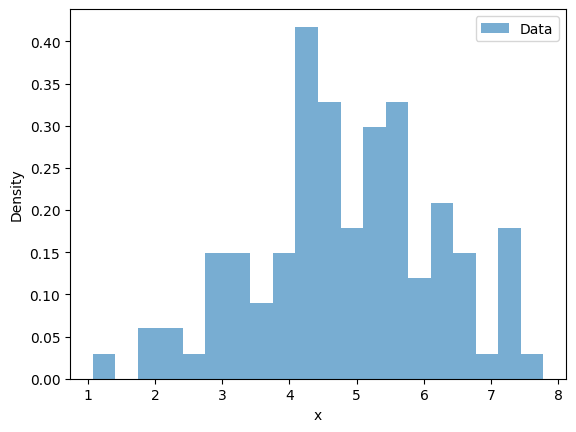

In [ ]:
plt.hist(data, bins=20, density=True, alpha=0.6, label='Data')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# defining the log-likelihood function
def log_likelihood(params):
    mu, sigma = params
    if sigma <= 0:  # Ensuring sigma is positive
        return -np.inf
    return -0.5 * np.sum(((data - mu) / sigma) ** 2 + np.log(2 * np.pi * sigma**2))

In [ ]:
nwalkers = 50
ndim = 2  # mu and sigma

In [ ]:
# Initial positions of the walkers
p0 = np.random.rand(nwalkers, ndim) * [10, 2]  # Random initial guesses

In [ ]:
def log_posterior(params):
    return log_likelihood(params)  # Assuming uniform prior

In [ ]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior)

In [ ]:
sampler.run_mcmc(p0, 500)  # 500 steps

State([[4.93567328 1.31383655]
 [5.04843235 1.5537173 ]
 [4.81999615 1.34962692]
 [4.76775542 1.33542414]
 [4.9543059  1.38383626]
 [4.85316699 1.41185388]
 [4.98594723 1.45409905]
 [4.61544354 1.31363813]
 [4.92997508 1.29774111]
 [5.20932091 1.33455852]
 [4.95065003 1.45403442]
 [4.68715523 1.32713851]
 [4.76640701 1.3747648 ]
 [4.98337224 1.36913715]
 [4.9562473  1.56343345]
 [4.90639119 1.16279772]
 [4.81727183 1.65292364]
 [4.98175627 1.27809666]
 [5.0329136  1.30423153]
 [4.82434537 1.35779645]
 [4.66465954 1.34691335]
 [4.9582741  1.41394927]
 [4.866598   1.27520925]
 [4.60972357 1.50422614]
 [4.8230302  1.4439481 ]
 [4.65756451 1.4146372 ]
 [4.83184365 1.33609688]
 [4.76211552 1.44796539]
 [4.8833571  1.27777492]
 [4.8472496  1.35550634]
 [4.92075097 1.24793773]
 [4.66595473 1.53234302]
 [4.80597096 1.3358838 ]
 [4.89140203 1.20960798]
 [5.03752841 1.39327063]
 [4.90184548 1.32167055]
 [4.79772372 1.46155331]
 [4.76035618 1.33037772]
 [5.06182961 1.41178342]
 [4.63186345 1.4037

In [ ]:
samples = sampler.get_chain(flat=True)

# Compute the mean of the samples
mu_est, sigma_est = np.mean(samples, axis=0)

print(f"Estimated mean (mu): {mu_est:.2f}")
print(f"Estimated standard deviation (sigma): {sigma_est:.2f}")


Estimated mean (mu): 4.86
Estimated standard deviation (sigma): 1.37


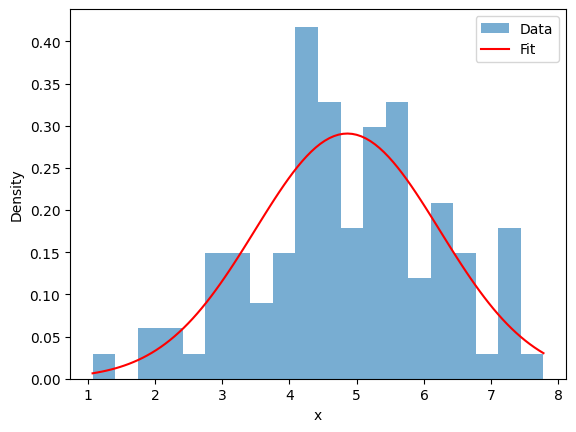

In [ ]:
x_vals = np.linspace(min(data), max(data), 100)
y_vals = (1 / (sigma_est * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - mu_est) / sigma_est) ** 2)

plt.hist(data, bins=20, density=True, alpha=0.6, label='Data')
plt.plot(x_vals, y_vals, color='red', label='Fit')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


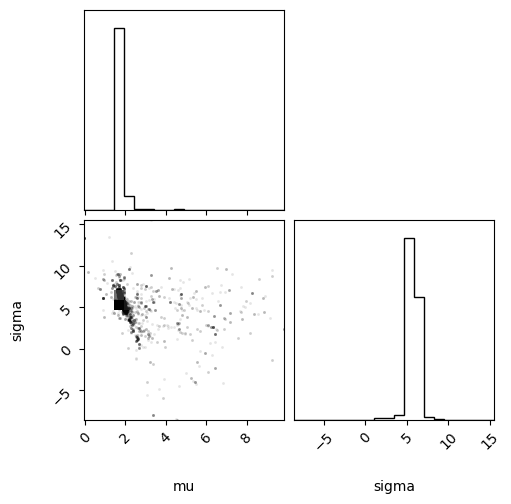

In [ ]:
import corner
# Trace plots
fig = corner.corner(samples, labels=["mu", "sigma"],)
plt.show()


100%|██████████| 5000/5000 [00:12<00:00, 387.99it/s]


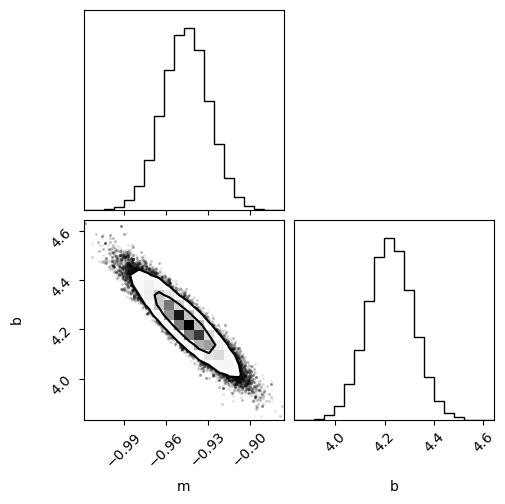

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def model(x, m, b):
    return m * x + b

def log_likelihood(theta, x, y, icov):
    m, b = theta
    mod = model(x, m, b)
    Delta = y - mod
    chisq = np.dot(Delta, np.dot(icov, Delta))
    return -0.5 * chisq


def log_prior(theta):
    m, b = theta
    if -2.0 < m < 2 and 3 < b < 6 : # uniform priors
        return 0.0
    return -np.inf


def log_probability(theta, x, y, icov):
    lp = log_prior(theta)
    if not np.isfinite(lp): # check if the parameters are outside the priors --> to reject them
        return -np.inf
    return lp + log_likelihood(theta, x, y, icov)



import emcee

# Generate mock data and covariance for demonstration purposes
m_true = -0.9594
b_true = 4.294

N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += yerr * np.random.randn(N)


cov = np.diag(yerr * yerr) # covariance
icov = np.linalg.inv(cov) # taking the inverse


nwalkers = 32 # number of walkers
ndim = 2 # number of parameters in the model

# initializing the walkers
p_m  = np.random.uniform(-1, 1, nwalkers)
p_c  = np.random.uniform(4, 5.0, nwalkers)
pos = np.transpose([p_m, p_c]) # assigning random positions with in the priors

# initializing the sampler and running the chains
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, icov))
sampler.run_mcmc(pos, 5000, progress=True); # running with 5000 steps


#discarding 1000 steps
flat_samples = sampler.get_chain(discard=1000, flat=True)
chisq = -2*sampler.get_log_prob(discard=1000, flat=True)
#here we are saving the chains with chisq as last column
mat = np.zeros((len(flat_samples[:,0]), len(flat_samples[0,:]) + 1))
mat[:,:-1] = flat_samples
mat[:, -1] = chisq
# np.savetxt('test_chains.dat', mat)

# getting the contours
import corner
labels = ["m", "b"]
fig = corner.corner(flat_samples, labels=labels, levels=[0.68, 0.95]);

# plt.savefig('test_corner.png')